In [1]:
import lalsimulation,lal
import matplotlib.pyplot as plt
%matplotlib notebook
import numpy as np

**Define binary parameters**

In [2]:
nqcCoeffsInput=lal.CreateREAL8Vector(10) ##This will be unused, but it is necessary
m1 = 67.59289191947715*lal.MSUN_SI
m2 = 22.901795866814176*lal.MSUN_SI
phi_c = 1.662251934907694
f_start22 = 8. #Frequency of the 22 mode at which the signal starts
distance =47.319574599147124*lal.PC_SI
spin1_z = 0.8893378340991678
spin2_z =  0.04369664350014335
deltaT = 1./16384.

**Generate the modes**

In [4]:
sphtseries, dyn, dynHi = lalsimulation.SimIMRSpinAlignedEOBModes(deltaT, m1, m2, f_start22, distance, spin1_z, spin2_z,41, 0., 0., 0.,0.,0.,0.,0.,0.,1.,1.,0.,nqcCoeffsInput, 0)

**Read the modes**

In [5]:
hlm = {}

##55 mode
modeL = sphtseries.l
modeM = sphtseries.m
print 'Loading mode', modeL, modeM
h55 = sphtseries.mode.data.data #This is h_55
hlm[(modeL, modeM)] = h55

##44 mode
modeL = sphtseries.next.l
modeM = sphtseries.next.m
print 'Loading mode', modeL, modeM
h44 = sphtseries.next.mode.data.data #This is h_44
hlm[(modeL, modeM)] = h44

##21 mode
modeL = sphtseries.next.next.l
modeM = sphtseries.next.next.m
print 'Loading mode', modeL, modeM
h21 = sphtseries.next.next.mode.data.data #This is h_21
hlm[(modeL, modeM)] = h21

##33 mode
modeL = sphtseries.next.next.next.l
modeM = sphtseries.next.next.next.m
print 'Loading mode', modeL, modeM
h33 = sphtseries.next.next.next.mode.data.data #This is h_33
hlm[(modeL, modeM)] = h33

##22 mode
modeL = sphtseries.next.next.next.next.l
modeM = sphtseries.next.next.next.next.m
print 'Loading mode', modeL, modeM
h22 = sphtseries.next.next.next.next.mode.data.data #This is h_22
hlm[(modeL, modeM)] = h22

##time array (s)
time_array = np.arange(0,len(h22)*deltaT,deltaT)

Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2


**Plotting amplitude and phase of the single modes**

/home/abhirup/src/pycbc/local/lib/python2.7/site-packages/numpy/lib/function_base.py:2165: RuntimeWarning: invalid value encountered in greater
  _nx.copyto(ddmod, pi, where=(ddmod == -pi) & (dd > 0))
/home/abhirup/src/pycbc/local/lib/python2.7/site-packages/numpy/lib/function_base.py:2167: RuntimeWarning: invalid value encountered in less
  _nx.copyto(ph_correct, 0, where=abs(dd) < discont)


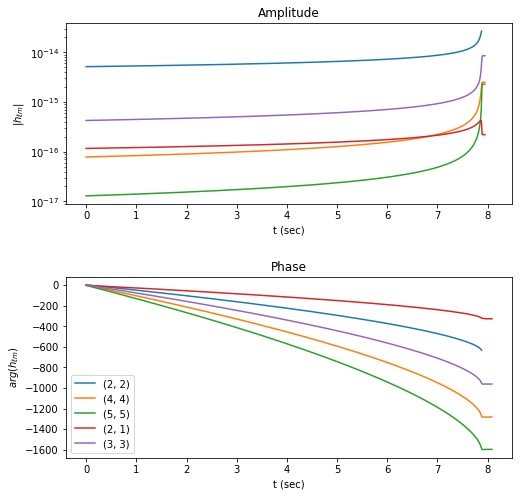

In [6]:
plt.figure(figsize=(8,8))
for mode in hlm.keys():
    plt.subplot(211)
    plt.semilogy(time_array,np.abs(hlm[mode]), label=str(mode))
    plt.xlabel('t (sec)')
    plt.ylabel('$|h_{\ell m}|$')
    plt.title('Amplitude') 
    plt.subplot(212)
    plt.plot(time_array,np.unwrap(np.angle(hlm[mode])), label=str(mode))
    plt.xlabel('t (sec)')
    plt.ylabel('$arg(h_{\ell m})$')
    plt.title('Phase') 
plt.xlabel('t (sec)')   
plt.legend()
plt.subplots_adjust(hspace=0.4)
plt.show()    

**Generate the full waveform **

In [7]:
inclination = 0.5
hp, hc =  lalsimulation.SimInspiralChooseTDWaveform(m1, m2,  0., 0., spin1_z, 0., 0., spin2_z, distance, inclination, phi_c, 0., 0., 0., deltaT, f_start22, f_start22, None, lalsimulation.SEOBNRv4HM)
h = hp.data.data - 1j*hc.data.data

**Plot the waveform**

/home/abhirup/src/pycbc/local/lib/python2.7/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


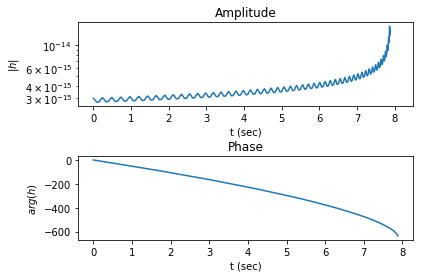

In [8]:
plt.subplot(211)
plt.semilogy(time_array, np.abs(h))
plt.xlabel('t (sec)')
plt.ylabel('$|h|$')
plt.title('Amplitude') 
plt.subplot(212)
plt.plot(time_array,np.unwrap(np.angle(h)))
plt.xlabel('t (sec)')
plt.ylabel('$arg(h)$')
plt.title('Phase') 
plt.xlabel('t (sec)')   
plt.legend()
plt.subplots_adjust(hspace=0.6)
plt.show()